# Data Science Capstone Three: Project Oil Prices Forecast EDA

## Project Description

> #### According to New York Times, "Gas prices in the United States are at record highs. And even when adjusting for inflation, they are on average at levels rarely seen in the last 50 years, including during the energy crisis of the late 1970s." The purpose of this project is to look at the historical data to test if current increase could have been predicted using time series forecasting models, like AR or ARIMA.


### Data Source

* Source: U.S. Energy Information Administration (Jan 2021)
* The data contains the following information:
> * A1: Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
> * A2: Weekly U.S. All Grades Conventional Retail Gasoline Prices (Dollars per Gallon)
> * A3: Weekly U.S. All Grades Reformulated Retail Gasoline Prices (Dollars per Gallon)
> * R1: Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
> * R2: Weekly U.S. Regular Conventional Retail Gasoline Prices (Dollars per Gallon)
> * R3: Weekly U.S. Regular Reformulated Retail Gasoline Prices (Dollars per Gallon)
> * M1: Weekly U.S. Midgrade All Formulations Retail Gasoline Prices (Dollars per Gallon)
> * M2: Weekly U.S. Midgrade Conventional Retail Gasoline Prices (Dollars per Gallon)
> * M3: Weekly U.S. Midgrade Reformulated Retail Gasoline Prices (Dollars per Gallon)
> * P1: Weekly U.S. Premium All Formulations Retail Gasoline Prices (Dollars per Gallon)> *
> * P2: Weekly U.S. Premium Conventional Retail Gasoline Prices (Dollars per Gallon)
> * P3: Weekly U.S. Premium Reformulated Retail Gasoline Prices (Dollars per Gallon)
> * D1: Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon) 

* Data Retrieved August 28, 2022 from (https://www.kaggle.com/datasets/mruanova/us-gasoline-and-diesel-retail-prices-19952021/download?datasetVersionNumber=1)

In [1]:
#Import python libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
#Load the Data 
datapath = '../data/summary_data_cleaned.csv'

df = pd.read_csv(datapath, index_col=0)

df.drop(columns=('Day'), inplace=True)

df


,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1,Year,Month
0,1995-01-02,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104,1995,1
1,1995-01-09,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102,1995,1
2,1995-01-16,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100,1995,1
3,1995-01-23,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095,1995,1
4,1995-01-30,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090,1995,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,2020-12-28,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635,2020,12
1357,2021-01-04,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640,2021,1
1358,2021-01-11,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670,2021,1
1359,2021-01-18,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696,2021,1


In [3]:
print(df.shape, df.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1361 entries, 0 to 1360
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1361 non-null   object 
 1   A1      1361 non-null   float64
 2   A2      1361 non-null   float64
 3   A3      1361 non-null   float64
 4   R1      1361 non-null   float64
 5   R2      1361 non-null   float64
 6   R3      1361 non-null   float64
 7   M1      1361 non-null   float64
 8   M2      1361 non-null   float64
 9   M3      1361 non-null   float64
 10  P1      1361 non-null   float64
 11  P2      1361 non-null   float64
 12  P3      1361 non-null   float64
 13  D1      1361 non-null   float64
 14  Year    1361 non-null   int64  
 15  Month   1361 non-null   int64  
dtypes: float64(13), int64(2), object(1)
memory usage: 180.8+ KB
(1361, 16) None


## Part II. EDA


In [4]:
df1 = df

# Called describe() method to gather key statistics on the df. 

df.drop(columns=['Month'], inplace=True)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1,1361.0,2.285680,0.859028,0.949,1.461,2.326,2.903,4.165
A2,1361.0,2.234511,0.843815,0.926,1.433,2.251,2.825,4.102
A3,1361.0,2.396873,0.883311,1.039,1.550,2.458,3.060,4.301
R1,1361.0,2.225170,0.850143,0.907,1.421,2.237,2.828,4.114
R2,1361.0,2.178511,0.835549,0.885,1.393,2.175,2.765,4.054
R3,1361.0,2.329126,0.876739,0.974,1.489,2.367,2.976,4.247
M1,1361.0,2.382822,0.882107,1.008,1.517,2.481,3.033,4.229
M2,1361.0,2.320970,0.858521,0.979,1.482,2.404,2.930,4.153
M3,1361.0,2.508877,0.908861,1.112,1.616,2.627,3.206,4.387
P1,1361.0,2.519840,0.911055,1.100,1.607,2.693,3.209,4.344


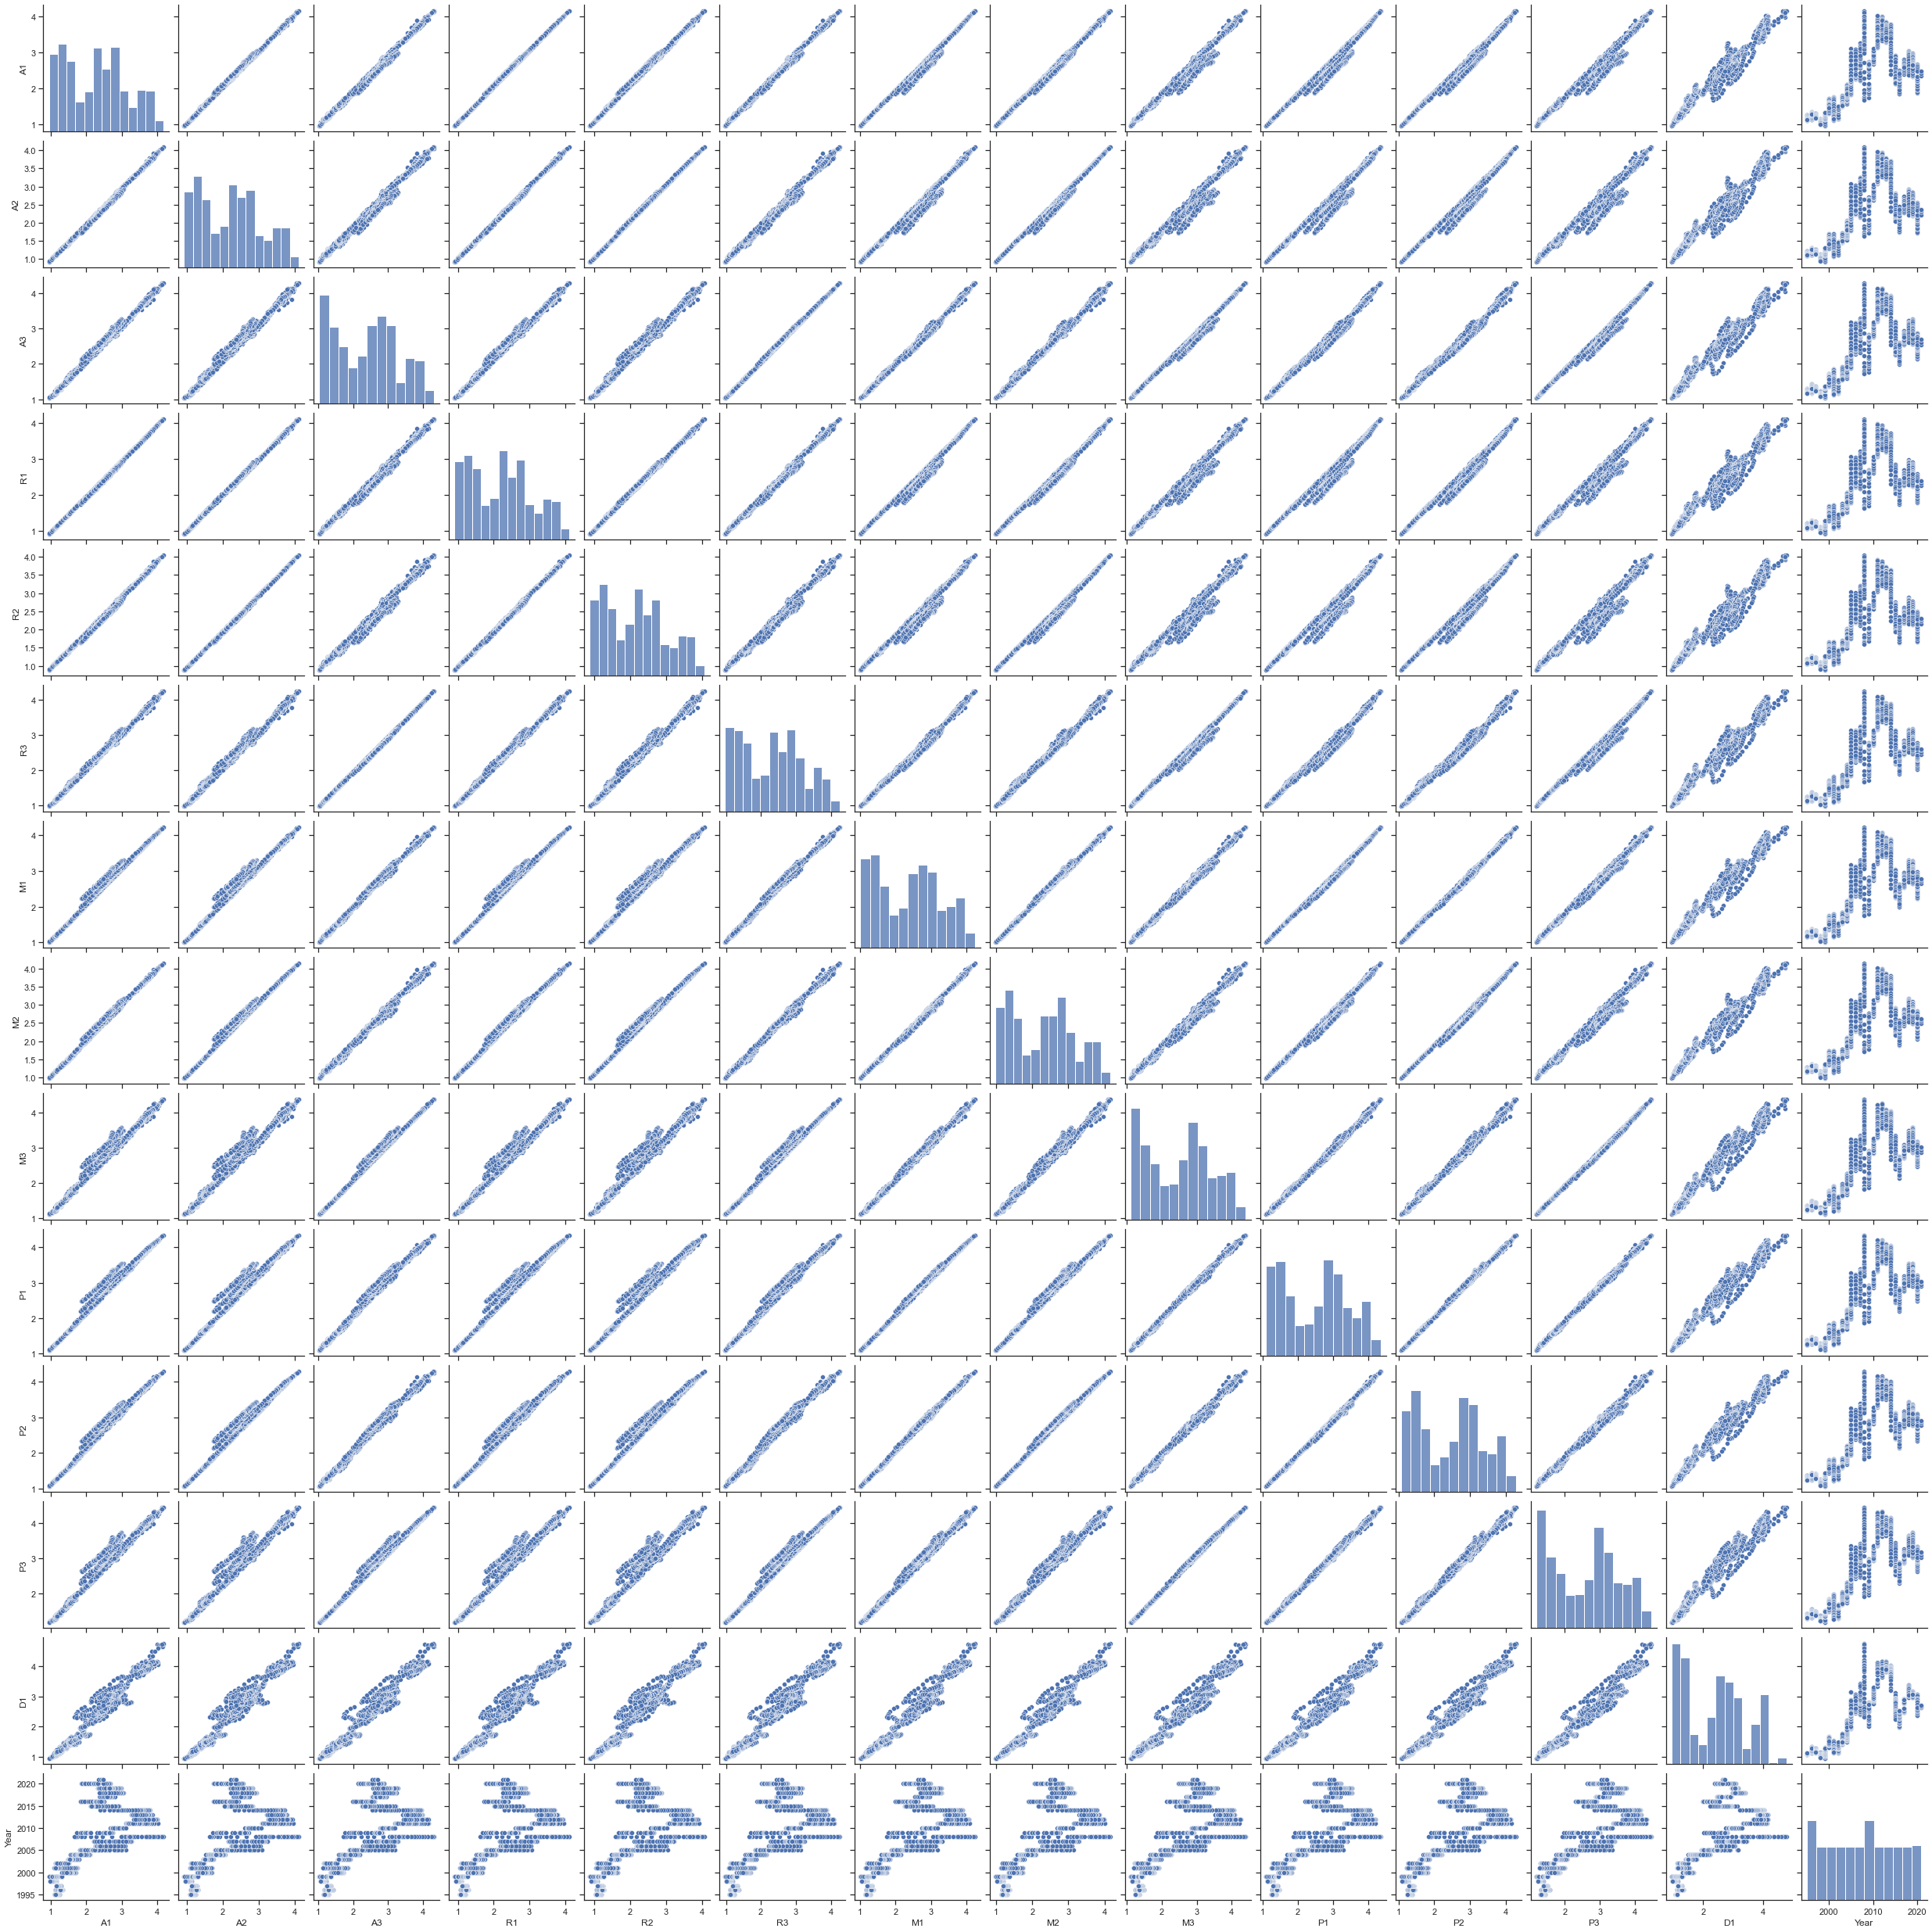

In [5]:
#Viziualize price distribution 

import seaborn as sns

sns.set_theme(style="ticks")

sns.pairplot(df)


In [6]:
# Used the groupby() method to check mean distribution of prices in df.

df1['Average_Prices'] = ((df1['A1']+df1['A2']+df1['A3']+df1['R1']+df1['R2']+df1['R3']+df1['M1']+df1['M2']+df1['M3']+df1['P1']+df1['P2']+df1['P3']+df1['D1'])/13)

df1.head()

mean = df.groupby(by='Year').mean().T

mean

Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
A1,1.157712,1.244528,1.244250,1.071712,1.176058,1.522731,1.460302,1.385962,1.603019,1.894692,...,3.679642,3.575365,3.436615,2.519923,2.249962,2.527885,2.813189,2.691327,2.258250,2.420250
A2,1.143538,1.230830,1.227788,1.056212,1.155519,1.500692,1.422019,1.352212,1.554577,1.851077,...,3.609830,3.510519,3.376423,2.422692,2.177173,2.447769,2.714358,2.566346,2.144019,2.309750
A3,1.219615,1.296849,1.306808,1.133135,1.260154,1.605135,1.548849,1.452885,1.700635,1.983712,...,3.821849,3.707442,3.559288,2.718000,2.398000,2.691231,3.008151,2.937596,2.483962,2.637500
R1,1.110865,1.199075,1.199038,1.029654,1.135808,1.483808,1.420057,1.344500,1.561096,1.852212,...,3.618358,3.504865,3.357673,2.429212,2.143250,2.414615,2.718547,2.603904,2.167519,2.334250
R2,1.103308,1.191925,1.188692,1.016654,1.115981,1.462308,1.383830,1.312673,1.515808,1.811615,...,3.552208,3.442865,3.298788,2.333750,2.070462,2.333173,2.630528,2.500519,2.073712,2.243750
R3,1.162500,1.241792,1.252327,1.077788,1.195154,1.542865,1.498415,1.408423,1.654712,1.937365,...,3.757283,3.634981,3.481365,2.629288,2.296096,2.585500,2.904057,2.826615,2.369846,2.526750
M1,1.200635,1.285170,1.284192,1.121904,1.233596,1.576462,1.513283,1.439423,1.658231,1.950365,...,3.755660,3.662577,3.539423,2.644827,2.394615,2.681615,3.055434,2.999288,2.583000,2.719000
M2,1.196000,1.280151,1.276712,1.105885,1.207019,1.548750,1.467792,1.399212,1.600615,1.897846,...,3.670906,3.584038,3.469154,2.530865,2.312904,2.595096,2.934302,2.825962,2.428500,2.562500
M3,1.284904,1.363962,1.377269,1.201058,1.331115,1.670308,1.615226,1.516654,1.769558,2.052115,...,3.919736,3.814577,3.675365,2.865442,2.552404,2.848885,3.247057,3.251269,2.809231,2.950750
P1,1.297981,1.380642,1.380058,1.213865,1.319635,1.662942,1.602472,1.530154,1.747808,2.041654,...,3.894226,3.822462,3.710192,2.830192,2.615750,2.916500,3.294245,3.251269,2.834115,2.975250


In [7]:
# Used the groupby() method to check std distribution of average prices in df1.
df1.groupby(by='Year').std().T


Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
A1,0.044142,0.060277,0.031562,0.037164,0.122661,0.092247,0.171307,0.112842,0.086271,0.137499,...,0.205732,0.160128,0.347630,0.259804,0.173597,0.109036,0.164799,0.176517,0.193219,0.064922
A2,0.046129,0.059518,0.032204,0.038277,0.125747,0.089004,0.166404,0.108231,0.080376,0.131199,...,0.201631,0.161584,0.342300,0.241367,0.182816,0.111069,0.170880,0.168635,0.198798,0.061975
A3,0.037343,0.074673,0.030394,0.036637,0.116708,0.101934,0.191616,0.123703,0.104400,0.152219,...,0.218738,0.159415,0.358984,0.301351,0.158053,0.107056,0.154413,0.198003,0.184653,0.071715
R1,0.044107,0.060603,0.031638,0.036813,0.123044,0.093493,0.172653,0.112531,0.086694,0.137637,...,0.207936,0.165081,0.352348,0.265299,0.173987,0.107952,0.173543,0.176866,0.194744,0.065581
R2,0.045978,0.059651,0.032473,0.038662,0.125775,0.090401,0.167481,0.108188,0.080863,0.131490,...,0.203246,0.166990,0.346239,0.246858,0.182351,0.109154,0.181691,0.169583,0.200090,0.062708
R3,0.039860,0.072566,0.029531,0.038814,0.116231,0.100828,0.192089,0.123158,0.105146,0.152272,...,0.222033,0.163891,0.366186,0.308126,0.159718,0.107518,0.159448,0.197754,0.185666,0.073031
M1,0.044543,0.059364,0.032009,0.033141,0.122173,0.089897,0.170580,0.113300,0.087260,0.137789,...,0.203987,0.152685,0.340843,0.254562,0.171824,0.110989,0.175099,0.177202,0.186252,0.062016
M2,0.046679,0.059592,0.031821,0.037503,0.125888,0.086259,0.164856,0.108340,0.080405,0.130651,...,0.199317,0.152763,0.336155,0.234060,0.183926,0.114340,0.174735,0.163028,0.190578,0.059321
M3,0.035444,0.076642,0.029933,0.037112,0.115471,0.102903,0.192594,0.124476,0.107670,0.153587,...,0.219059,0.155096,0.350602,0.298503,0.152219,0.107313,0.163419,0.205361,0.181985,0.067173
P1,0.044014,0.059574,0.030748,0.034280,0.121016,0.088723,0.168448,0.113705,0.083987,0.137158,...,0.198390,0.144172,0.331531,0.240598,0.173698,0.113235,0.176976,0.178420,0.184935,0.062024


In [8]:
correlations = df1.corr()

correlations.style.background_gradient(cmap='coolwarm')

,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1,Year,Average_Prices
A1,1.000000,0.999355,0.997837,0.999690,0.998544,0.998759,0.996211,0.998498,0.990796,0.990455,0.993426,0.986681,0.984298,0.705524,0.998179
A2,0.999355,1.000000,0.994894,0.999662,0.999689,0.996459,0.993030,0.996874,0.985604,0.985780,0.989919,0.980726,0.982315,0.684846,0.995785
A3,0.997837,0.994894,1.000000,0.996427,0.993184,0.999698,0.998523,0.998049,0.996974,0.995441,0.996323,0.994173,0.984534,0.738181,0.999174
R1,0.999690,0.999662,0.996427,1.000000,0.999448,0.997903,0.994383,0.997351,0.988042,0.987353,0.990716,0.983184,0.982596,0.690196,0.996763
R2,0.998544,0.999689,0.993184,0.999448,1.000000,0.995237,0.991125,0.995481,0.982943,0.982758,0.987136,0.977419,0.980510,0.670851,0.994143
R3,0.998759,0.996459,0.999698,0.997903,0.995237,1.000000,0.997613,0.997914,0.995030,0.993244,0.994633,0.991473,0.983661,0.723884,0.998783
M1,0.996211,0.993030,0.998523,0.994383,0.991125,0.997613,1.000000,0.999018,0.998204,0.998481,0.999048,0.996596,0.986761,0.755736,0.999467
M2,0.998498,0.996874,0.998049,0.997351,0.995481,0.997914,0.999018,1.000000,0.994810,0.995706,0.997772,0.992274,0.987154,0.732249,0.999539
M3,0.990796,0.985604,0.996974,0.988042,0.982943,0.995030,0.998204,0.994810,1.000000,0.998900,0.997617,0.999392,0.983249,0.779582,0.996668
P1,0.990455,0.985780,0.995441,0.987353,0.982758,0.993244,0.998481,0.995706,0.998900,1.000000,0.999393,0.999118,0.984871,0.787284,0.996682


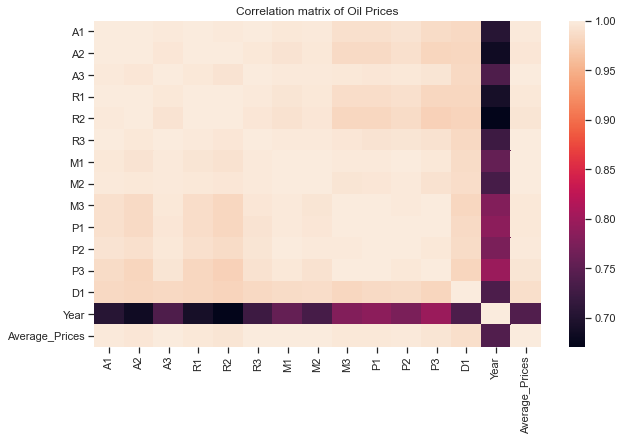

<Figure size 720x432 with 0 Axes>

In [9]:
import seaborn as sns

hm = sns.heatmap(correlations, annot = False)

hm.set (title = "Correlation matrix of Oil Prices")

plt.show()

plt.savefig("Plotting_Correlation_HeatMap.jpg")

In [10]:
new_df = df1[['Average_Prices','Date']]

#Parse strings to datetime type
new_df['Date'] = pd.to_datetime(new_df['Date'],infer_datetime_format=True) #convert from string to datetime

indexedf = new_df.set_index(['Date'])

indexedf.head(5)

<ipython-input-10-05db59a12eb7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Date'] = pd.to_datetime(new_df['Date'],infer_datetime_format=True) #convert from string to datetime


,Average_Prices
Date,
1995-01-02,1.185385
1995-01-09,1.189769
1995-01-16,1.184231
1995-01-23,1.186769
1995-01-30,1.184154


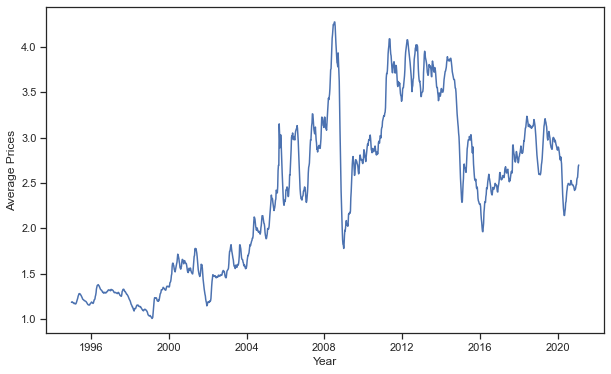

In [11]:
## plot graph

plt.xlabel('Year')
plt.ylabel('Average Prices')
plt.plot(indexedf)

In [12]:
#Determine rolling statistics
rolmean = indexedf.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = indexedf.rolling(window=12).std()
print(rolmean,rolstd)

            Average_Prices
Date                      
1995-01-02             NaN
1995-01-09             NaN
1995-01-16             NaN
1995-01-23             NaN
1995-01-30             NaN
...                    ...
2020-12-28        2.467263
2021-01-04        2.474359
2021-01-11        2.487821
2021-01-18        2.506551
2021-01-25        2.528782

[1361 rows x 1 columns]             Average_Prices
Date                      
1995-01-02             NaN
1995-01-09             NaN
1995-01-16             NaN
1995-01-23             NaN
1995-01-30             NaN
...                    ...
2020-12-28        0.042329
2021-01-04        0.050324
2021-01-11        0.065910
2021-01-18        0.085390
2021-01-25        0.097781

[1361 rows x 1 columns]


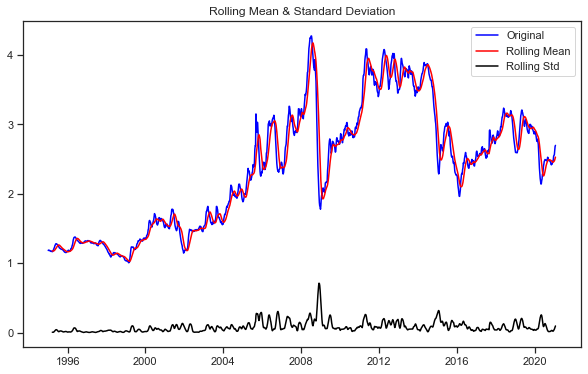

In [13]:
#Plot rolling statistics
orig = plt.plot(indexedf, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so.

To further augment our hypothesis that the time series is not stationary, let us perform the ADCF test

## Part III. Preprocessing and Training Data Development

In [14]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedf['Average_Prices'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   -2.225595
p-value                           0.197087
#Lags Used                        9.000000
Number of Observations Used    1351.000000
Critical Value (1%)              -3.435200
Critical Value (5%)              -2.863682
Critical Value (10%)             -2.567910
dtype: float64


For a Time series to be stationary, its ADCF test should have:

* p-value to be low (according to the null hypothesis)
* The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics
* From the above ADCF test result, we see that p-value is relatvely large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is not stationary

Data Transformation to achieve Stationarity 
There are a couple of ways to achieve stationarity through data transformation like taking  log10 , loge , square, square root, cube, cube root, exponential decay, time shift and so on ...

In our notebook, lets start of with log transformations. Our objective is to remove the trend component. Hence, flatter curves( ie: paralle to x-axis) for time series and rolling mean after taking log would say that our data transformation did a good job.

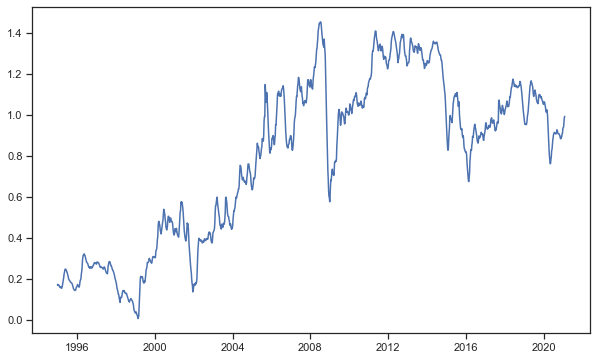

In [15]:
#Estimating trend

indexedf_logScale = np.log(indexedf)

plt.plot(indexedf_logScale)

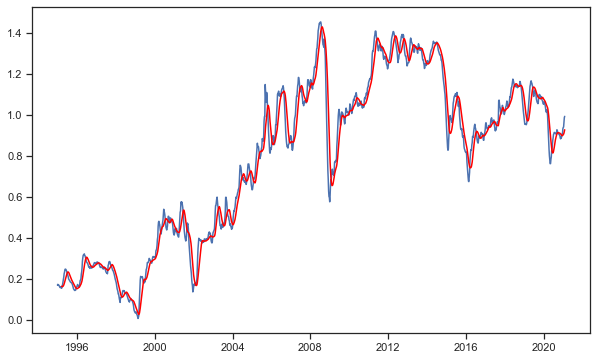

In [16]:
#The below transformation is required to make series stationary

movingAverage = indexedf_logScale.rolling(window=12).mean()
movingSTD = indexedf_logScale.rolling(window=12).std()
plt.plot(indexedf_logScale)
plt.plot(movingAverage, color='red')

In [17]:
datasetLogScaleMinusMovingAverage = indexedf_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Average_Prices
Date,
1995-03-20,-0.009743
1995-03-27,-0.005978
1995-04-03,0.002180
1995-04-10,0.012956
1995-04-17,0.021560
1995-04-24,0.034739
1995-05-01,0.038899
1995-05-08,0.050061
1995-05-15,0.050914


In [35]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(indexedf['Average_Prices'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    


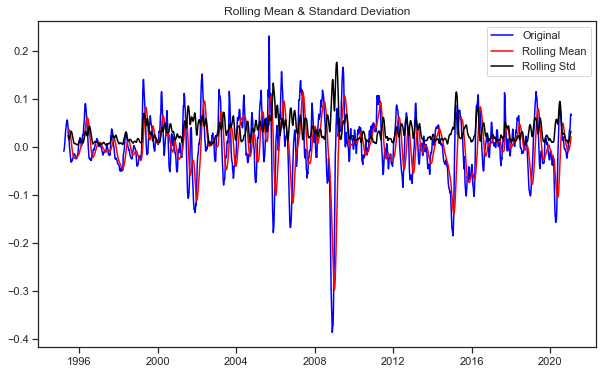

Results of Dickey Fuller Test:
Test Statistic                   -2.225595
p-value                           0.197087
#Lags Used                        9.000000
Number of Observations Used    1351.000000
Critical Value (1%)              -3.435200
Critical Value (5%)              -2.863682
Critical Value (10%)             -2.567910
dtype: float64


In [36]:
test_stationarity(datasetLogScaleMinusMovingAverage)


Exponential Decay Transformation 

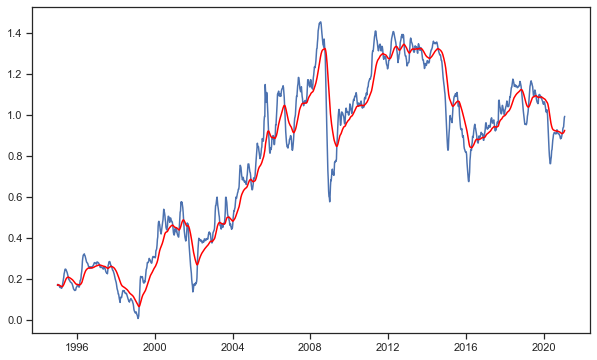

In [37]:
exponentialDecayWeightedAverage = indexedf_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedf_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

From above graph, it seems that exponential decay is not holding any advantage over log scale as both the corresponding curves are similar. But, in statistics, inferences cannot be drawn simply by looking at the curves. Hence, we perform the ADCF test again on the decay series below.

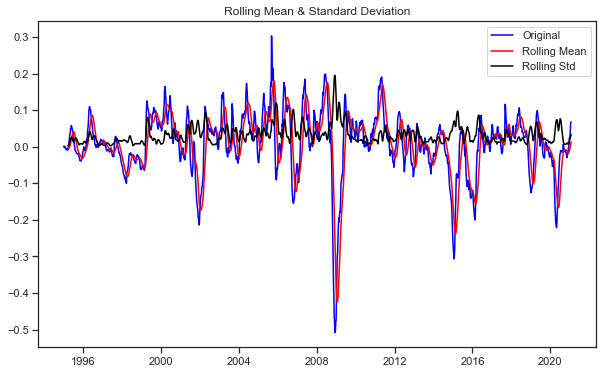

Results of Dickey Fuller Test:
Test Statistic                   -2.225595
p-value                           0.197087
#Lags Used                        9.000000
Number of Observations Used    1351.000000
Critical Value (1%)              -3.435200
Critical Value (5%)              -2.863682
Critical Value (10%)             -2.567910
dtype: float64


In [38]:
datasetLogScaleMinusExponentialMovingAverage = indexedf_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

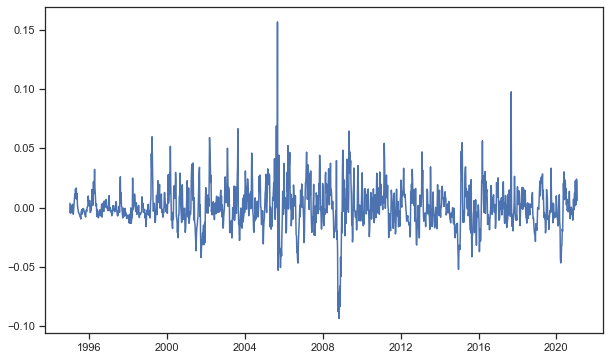

In [39]:
datasetLogDiffShifting = indexedf_logScale - indexedf_logScale.shift()
plt.plot(datasetLogDiffShifting)

Time Shift Transformation 

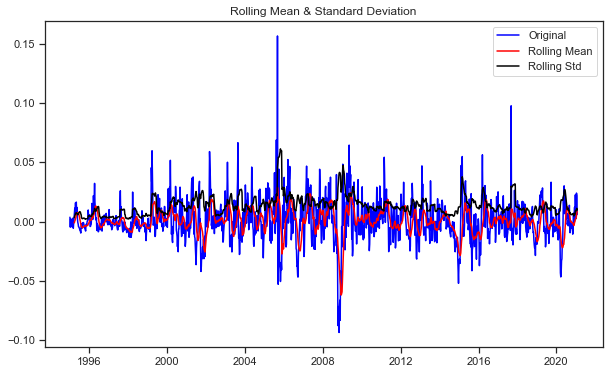

Results of Dickey Fuller Test:
Test Statistic                   -2.225595
p-value                           0.197087
#Lags Used                        9.000000
Number of Observations Used    1351.000000
Critical Value (1%)              -3.435200
Critical Value (5%)              -2.863682
Critical Value (10%)             -2.567910
dtype: float64


In [40]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

<ipython-input-32-b259998759db>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411)
<ipython-input-32-b259998759db>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411)


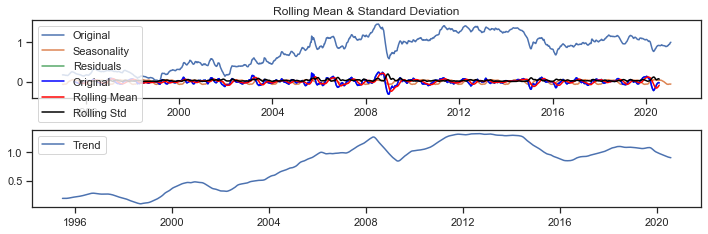

Results of Dickey Fuller Test:
Test Statistic                   -2.225595
p-value                           0.197087
#Lags Used                        9.000000
Number of Observations Used    1351.000000
Critical Value (1%)              -3.435200
Critical Value (5%)              -2.863682
Critical Value (10%)             -2.567910
dtype: float64


In [32]:
decomposition = seasonal_decompose(indexedf_logScale) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedf_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

Time Shift Transformation

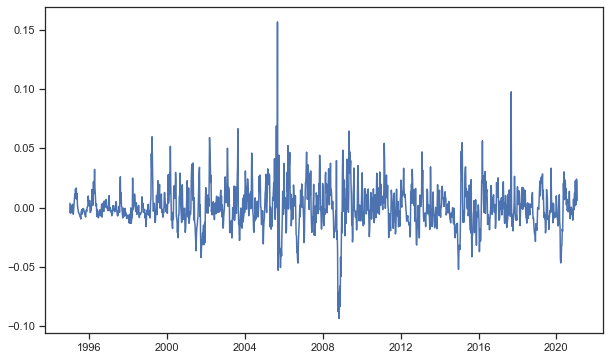

In [41]:
datasetLogDiffShifting = indexedf_logScale - indexedf_logScale.shift()
plt.plot(datasetLogDiffShifting)

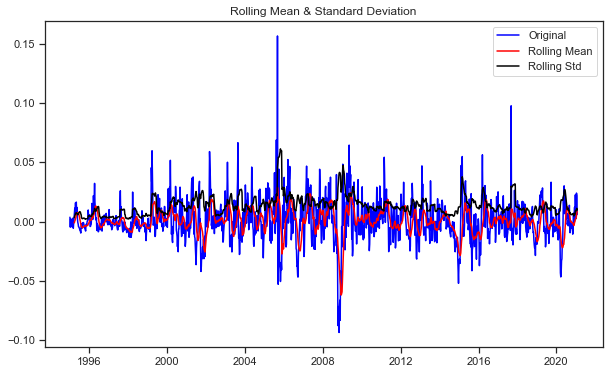

Results of Dickey Fuller Test:
Test Statistic                   -2.225595
p-value                           0.197087
#Lags Used                        9.000000
Number of Observations Used    1351.000000
Critical Value (1%)              -3.435200
Critical Value (5%)              -2.863682
Critical Value (10%)             -2.567910
dtype: float64


In [42]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

<ipython-input-44-b259998759db>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411)
<ipython-input-44-b259998759db>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411)


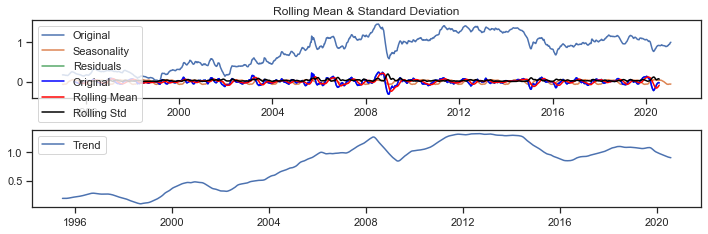

Results of Dickey Fuller Test:
Test Statistic                   -2.225595
p-value                           0.197087
#Lags Used                        9.000000
Number of Observations Used    1351.000000
Critical Value (1%)              -3.435200
Critical Value (5%)              -2.863682
Critical Value (10%)             -2.567910
dtype: float64


In [44]:
decomposition = seasonal_decompose(indexedf_logScale) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedf_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

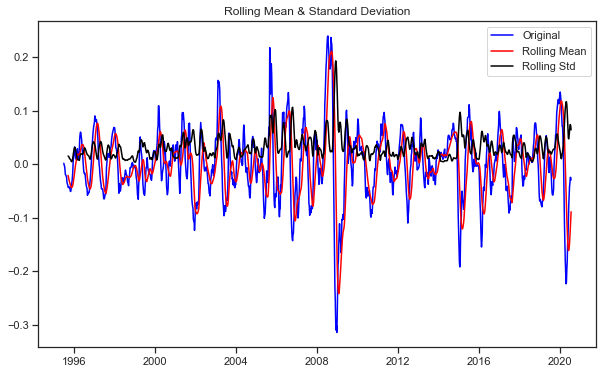

Results of Dickey Fuller Test:
Test Statistic                   -2.225595
p-value                           0.197087
#Lags Used                        9.000000
Number of Observations Used    1351.000000
Critical Value (1%)              -3.435200
Critical Value (5%)              -2.863682
Critical Value (10%)             -2.567910
dtype: float64


In [45]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

### Plotting ACF & PACF 

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


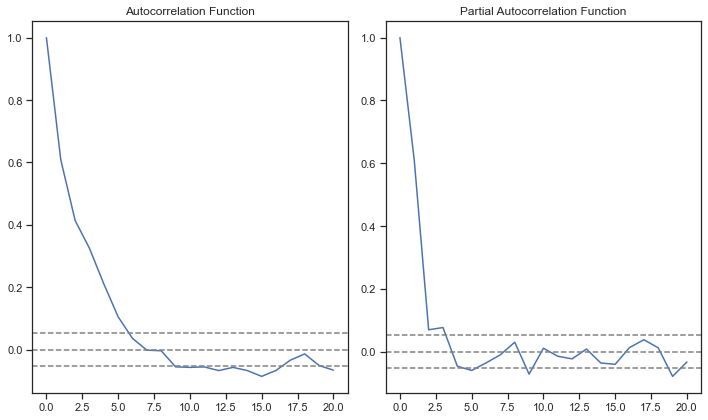

In [46]:
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            

From the ACF graph, we see that curve touches y=0.0 line at x=7. Thus, from theory, Q = 7 From the PACF graph, we see that curve touches y=0.0 line at x=5. Thus, from theory, P = 5

ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models will give a value of RSS. Lower RSS values indicate a better model.